# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [2]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

**1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?

fraud
0.0    0.912597
1.0    0.087403
Name: proportion, dtype: float64


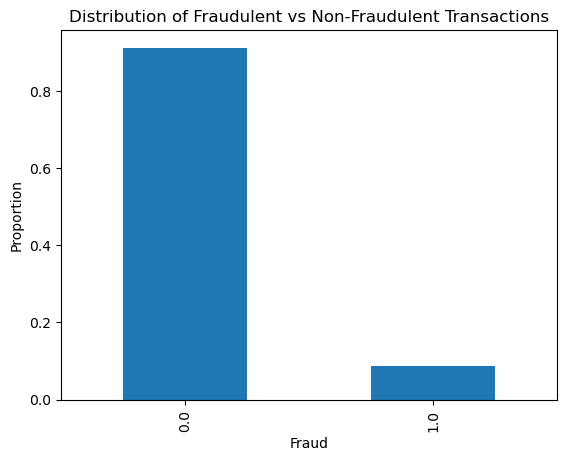

The dataset is imbalanced.


In [5]:
import matplotlib.pyplot as plt

# Check the distribution of the target variable
fraud_distribution = df['fraud'].value_counts(normalize=True)

# Print the distribution
print(fraud_distribution)

# Plot the distribution
fraud_distribution.plot(kind='bar')
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Fraud')
plt.ylabel('Proportion')
plt.show()

# Check if the dataset is imbalanced
if fraud_distribution.min() < 0.4:
    print("The dataset is imbalanced.")
else:
    print("The dataset is not imbalanced.")

**2.** Train a LogisticRegression.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Define features and target variable
X = df.drop(columns=['fraud'])
y = df['fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the LogisticRegression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    273779
         1.0       0.90      0.60      0.72     26221

    accuracy                           0.96    300000
   macro avg       0.93      0.80      0.85    300000
weighted avg       0.96      0.96      0.96    300000



**3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.

Confusion Matrix:
[[271938   1841]
 [ 10398  15823]]
Precision: 0.90
Recall: 0.60
F1-Score: 0.72
AUC-ROC: 0.97


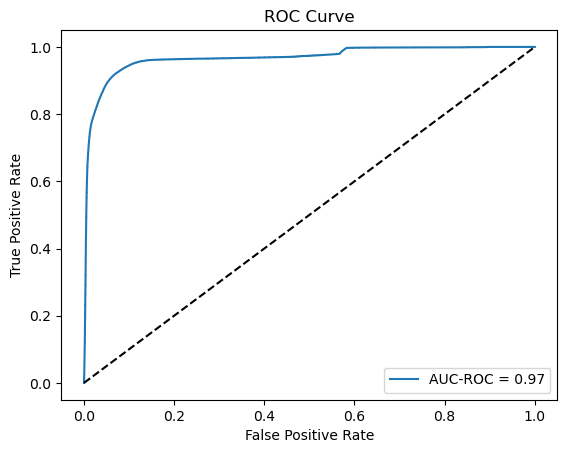

In [7]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate AUC-ROC
y_pred_prob = model.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_pred_prob)

# Print the evaluation metrics
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"AUC-ROC = {auc_roc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model?

In [8]:
pip install imblearn

Confusion Matrix (SMOTE):
[[255468  18311]
 [  1353  24868]]
Precision (SMOTE): 0.58
Recall (SMOTE): 0.95
F1-Score (SMOTE): 0.72
AUC-ROC (SMOTE): 0.98


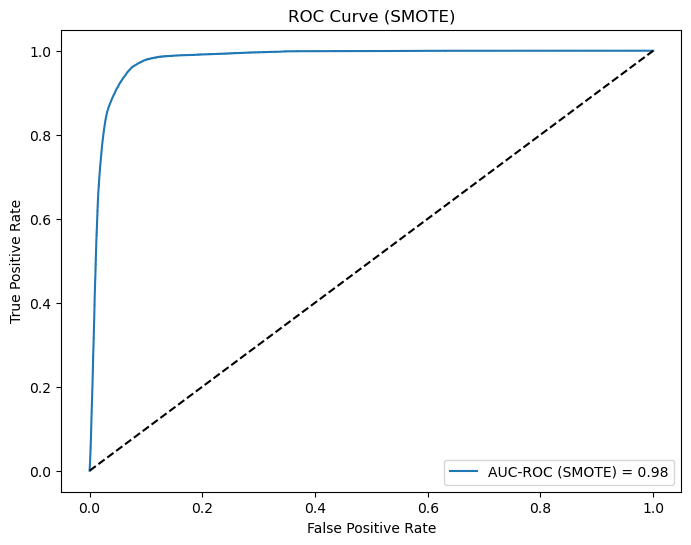

In [10]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target variable
X = df.drop(columns=['fraud'])
y = df['fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train the LogisticRegression model on the resampled data
model_smote = LogisticRegression(random_state=42)
model_smote.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred_smote = model_smote.predict(X_test)

# Calculate metrics
precision_smote = precision_score(y_test, y_pred_smote)
recall_smote = recall_score(y_test, y_pred_smote)
f1_smote = f1_score(y_test, y_pred_smote)
auc_roc_smote = roc_auc_score(y_test, model_smote.predict_proba(X_test)[:, 1])

# Confusion Matrix
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)

# Plot ROC Curve
fpr_smote, tpr_smote, _ = roc_curve(y_test, model_smote.predict_proba(X_test)[:, 1])

# Print the evaluation metrics for the resampled model
print(f"Confusion Matrix (SMOTE):\n{conf_matrix_smote}")
print(f"Precision (SMOTE): {precision_smote:.2f}")
print(f"Recall (SMOTE): {recall_smote:.2f}")
print(f"F1-Score (SMOTE): {f1_smote:.2f}")
print(f"AUC-ROC (SMOTE): {auc_roc_smote:.2f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_smote, tpr_smote, label=f"AUC-ROC (SMOTE) = {auc_roc_smote:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (SMOTE)')
plt.legend()
plt.show()


**5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?

Confusion Matrix (Undersample):
[[255526  18253]
 [  1324  24897]]
Precision (Undersample): 0.58
Recall (Undersample): 0.95
F1-Score (Undersample): 0.72
AUC-ROC (Undersample): 0.98


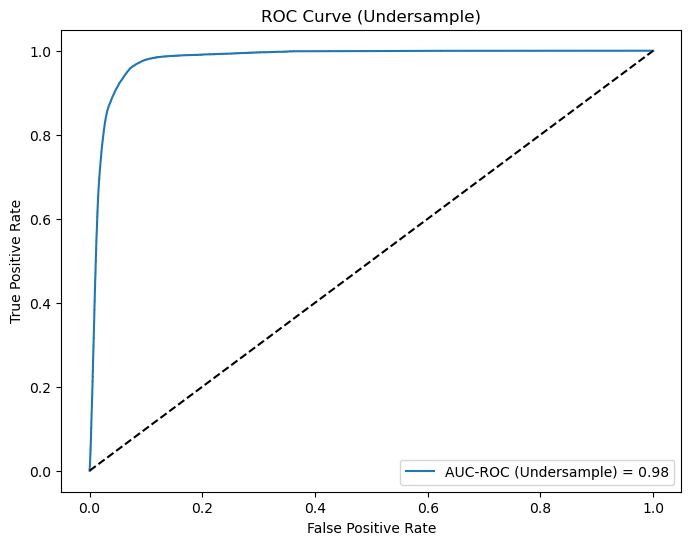

In [11]:
from imblearn.under_sampling import RandomUnderSampler

# Apply Random Under-Sampling to balance the dataset
undersample = RandomUnderSampler(random_state=42)
X_resampled_under, y_resampled_under = undersample.fit_resample(X_train, y_train)

# Train the LogisticRegression model on the undersampled data
model_undersample = LogisticRegression(random_state=42)
model_undersample.fit(X_resampled_under, y_resampled_under)

# Make predictions on the test set
y_pred_undersample = model_undersample.predict(X_test)

# Calculate metrics
precision_under = precision_score(y_test, y_pred_undersample)
recall_under = recall_score(y_test, y_pred_undersample)
f1_under = f1_score(y_test, y_pred_undersample)
auc_roc_under = roc_auc_score(y_test, model_undersample.predict_proba(X_test)[:, 1])

# Confusion Matrix
conf_matrix_under = confusion_matrix(y_test, y_pred_undersample)

# Plot ROC Curve
fpr_under, tpr_under, _ = roc_curve(y_test, model_undersample.predict_proba(X_test)[:, 1])

# Print the evaluation metrics for the undersampled model
print(f"Confusion Matrix (Undersample):\n{conf_matrix_under}")
print(f"Precision (Undersample): {precision_under:.2f}")
print(f"Recall (Undersample): {recall_under:.2f}")
print(f"F1-Score (Undersample): {f1_under:.2f}")
print(f"AUC-ROC (Undersample): {auc_roc_under:.2f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_under, tpr_under, label=f"AUC-ROC (Undersample) = {auc_roc_under:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Undersample)')
plt.legend()
plt.show()


**6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

Confusion Matrix (SMOTE):
[[255468  18311]
 [  1353  24868]]
Precision (SMOTE): 0.58
Recall (SMOTE): 0.95
F1-Score (SMOTE): 0.72
AUC-ROC (SMOTE): 0.98


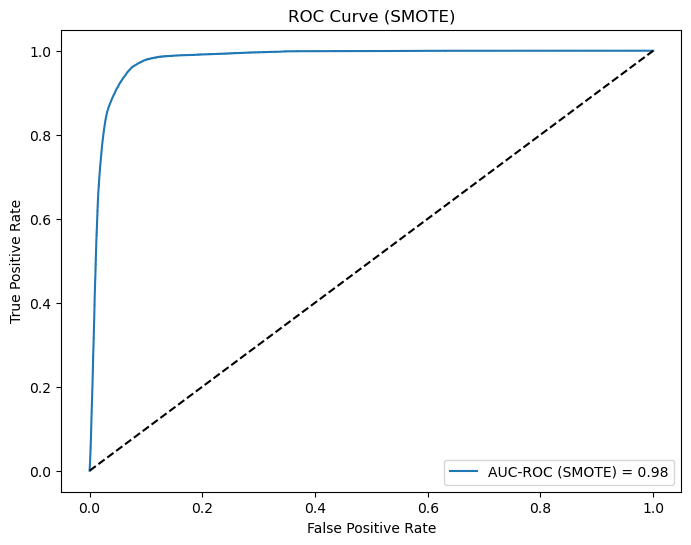

In [12]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target variable
X = df.drop(columns=['fraud'])
y = df['fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train the LogisticRegression model on the resampled data
model_smote = LogisticRegression(random_state=42)
model_smote.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred_smote = model_smote.predict(X_test)

# Calculate metrics
precision_smote = precision_score(y_test, y_pred_smote)
recall_smote = recall_score(y_test, y_pred_smote)
f1_smote = f1_score(y_test, y_pred_smote)
auc_roc_smote = roc_auc_score(y_test, model_smote.predict_proba(X_test)[:, 1])

# Confusion Matrix
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)

# Plot ROC Curve
fpr_smote, tpr_smote, _ = roc_curve(y_test, model_smote.predict_proba(X_test)[:, 1])

# Print the evaluation metrics for the resampled model
print(f"Confusion Matrix (SMOTE):\n{conf_matrix_smote}")
print(f"Precision (SMOTE): {precision_smote:.2f}")
print(f"Recall (SMOTE): {recall_smote:.2f}")
print(f"F1-Score (SMOTE): {f1_smote:.2f}")
print(f"AUC-ROC (SMOTE): {auc_roc_smote:.2f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_smote, tpr_smote, label=f"AUC-ROC (SMOTE) = {auc_roc_smote:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (SMOTE)')
plt.legend()
plt.show()
